In [14]:
%pylab inline
import networkx as nx
from shapely.geometry import Polygon, Point

matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

%run ../wmsrlib/WMSR.py

pylab.rcParams['figure.figsize'] = (10.0, 10.0)

Populating the interactive namespace from numpy and matplotlib


In [2]:
matplotlib.rcParams['ps.useafm'] = True
matplotlib.rcParams['pdf.use14corefonts'] = True
matplotlib.rcParams['text.usetex'] = True

matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 

In [3]:
### Candiates 
def rotate_trans(x, t, th):
    (x,y) = x
    (tx, ty) = t
    return x * cos(th) - y * sin(th) + tx, x * sin(th) + y * cos(th) + ty

def point_in_set(p, s, delta=.1):
    for cp in s:
        if math.hypot(p[1] - cp[1], p[0] - cp[0]) < delta:
            return True
    return False
        

def candidate(n1, n2, pos, C):
    # Best 
    b = (0.5, 0.8660254037844386)
    # Edge vector
    vx, vy = np.array(n1) - np.array(n2) 
    c = rotate_trans(b, n2, math.atan2(vy, vx))
    
    # If there is node or a candidate in that point    
    if point_in_set(c, pos.values()) or point_in_set(c, C):
        vx, vy = np.array(n2) - np.array(n1)
        c = rotate_trans(b, n1, math.atan2(vy, vx))
        
        #print point_in_set(c, pos.values()) or point_in_set(c, C), c
        #print C
        # If the second point also has a node
        if point_in_set(c, pos.values()) or point_in_set(c, C):
            return None
        
    return c

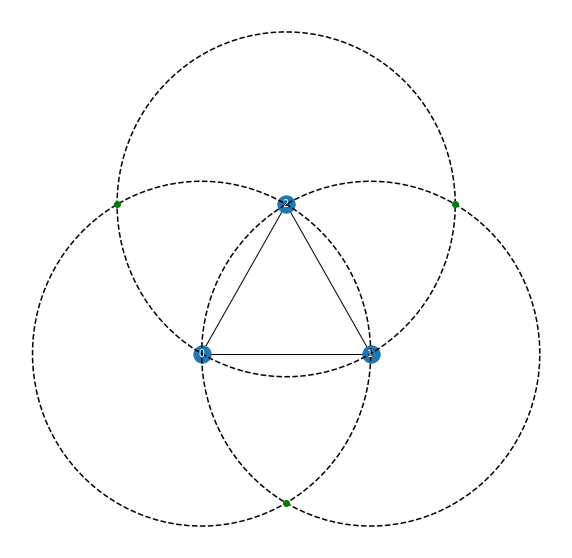

In [4]:
# Initial graph
def initial_graph():
    G = nx.Graph()
    G.add_node(0)
    G.add_node(1)
    G.add_node(2)
    G.add_edge(0,1)
    G.add_edge(1,2)
    G.add_edge(2,0)
    pos = {0:(0,0), 1:(1,0), 2: (.5, sqrt(1-.5**2))}

        
    return G, pos

def init_candidates(pos, pol=Polygon([(-100,-100), (100,-100), (100,100), (-100,100)])):
    C = []
    
    c1 = candidate(pos[1], pos[2], pos, C)
    c2 = candidate(pos[2], pos[0],pos, C)
    c3 = candidate(pos[0], pos[1], pos, C)
    C = [c1, c2, c3] 
    
    # Filter by polygon
    C = [ci for ci in C if pol.contains(Point(ci))]
        
    return C

######### Draw
# Radio
def draw_comm_radio(pos):
    th = np.linspace(0,2*math.pi, 100)
    for vx, vy in pos.values():
        #circle
        plt.plot(vx + np.cos(th), vy + np.sin(th), 'k--')

def draw_network(G, C, pos, comm_radio=True):
    if comm_radio:
        draw_comm_radio(pos)
    for (cx, cy) in C:
        plt.plot(cx, cy, 'go')

    nx.draw(G, pos=pos, with_labels=True, font_color='w')

def draw_polygon(P):
    px, py = np.array(P+[P[0]]).T
    plt.plot(px, py)  


G, pos = initial_graph()
# initial candidates
C = init_candidates(pos)


# Draw graph
draw_network(G, C, pos)


In [5]:
xx,yy = [9.0, 10.0, 11.0, 11.5, 12.0, 11.5, 12.0, 11.5, 12.0, 12.5, 12.0, 11.5, 11.0, 10.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 19.0, 13.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.5, 16.5, 17.0, 17.5, 20.0, 20.5, 21.0, 21.5, 19.5, 20.0, 21.0, 20.5, 21.5, 22.0, 22.5, 22.0, 22.5, 23.0, 24.0, 10.0, 9.5, 9.0, 8.5] , [22.516660498395403, 22.516660498395403, 22.516660498395403, 21.650635094610966, 20.784609690826528, 19.918584287042087, 19.05255888325765, 18.186533479473212, 17.32050807568877, 16.454482671904334, 15.588457268119894, 14.722431864335457, 13.856406460551018, 12.990381056766578, 16.454482671904334, 16.454482671904334, 16.454482671904334, 16.454482671904334, 16.454482671904334, 16.454482671904334, 16.454482671904334, 17.32050807568877, 17.32050807568877, 12.990381056766578, 12.12435565298214, 11.258330249197702, 10.392304845413264, 11.258330249197702, 10.392304845413264, 9.526279441628825, 9.526279441628825, 9.526279441628825, 10.392304845413264, 11.258330249197702, 15.588457268119894, 14.722431864335457, 13.856406460551018, 12.990381056766578, 18.186533479473212, 19.05255888325765, 20.784609690826528, 19.918584287042087, 21.650635094610966, 22.516660498395403, 21.650635094610966, 12.12435565298214, 11.258330249197702, 10.392304845413264, 10.392304845413264, 12.12435565298214, 11.258330249197702, 10.392304845413264, 9.526279441628825]
xx,yy= [16.5, 17.5, 18.5, 19.5, 20.5, 21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.0, 31.5, 32.0, 31.5, 31.0, 31.5, 32.0, 32.5, 16.0, 15.5, 16.0, 17.0, 16.5, 17.0, 16.5] , [18.186533479473212, 18.186533479473212, 18.186533479473212, 18.186533479473212, 18.186533479473212, 18.186533479473212, 18.186533479473212, 18.186533479473212, 18.186533479473212, 18.186533479473212, 18.186533479473212, 18.186533479473212, 18.186533479473212, 18.186533479473212, 18.186533479473212, 19.05255888325765, 19.918584287042087, 19.05255888325765, 18.186533479473212, 17.32050807568877, 16.454482671904334, 17.32050807568877, 18.186533479473212, 19.05255888325765, 18.186533479473212, 17.32050807568877, 19.05255888325765, 19.918584287042087, 17.32050807568877, 16.454482671904334]
xx,yy= [21.5, 22.5, 23.5, 24.5, 25.5, 26.5, 27.5, 28.5, 29.5, 30.5, 31.5, 32.5, 33.5, 20.5, 19.5, 18.5, 17.5, 16.5, 15.5, 14.5, 13.5, 14.0, 15.0, 16.0, 15.5, 14.5, 13.5, 13.0, 12.5, 13.0, 13.5, 14.0, 15.0, 14.5, 15.5, 16.0, 16.5, 17.0, 17.0, 16.5, 16.0, 15.0, 14.0, 13.0, 12.5, 12.0, 11.5, 12.0, 12.5, 13.0, 14.0, 15.0, 16.0, 15.5, 14.5, 13.5, 14.0, 15.0, 14.5, 14.5, 15.5, 13.5, 15.0, 14.0, 14.5, 34.5, 34.0, 33.0, 32.0, 31.0, 30.0, 29.0, 29.5, 30.5, 31.5, 32.5, 33.5, 33.0, 32.0, 31.0, 30.0, 30.5, 31.5, 32.5, 31.0, 32.0, 31.5, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 33.5, 32.5, 31.5, 30.5, 29.5, 30.0, 31.0, 32.0, 33.0, 32.5, 31.5, 30.5, 31.0, 32.0, 31.5] , [14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 14.722431864335457, 15.588457268119894, 15.588457268119894, 15.588457268119894, 16.454482671904334, 16.454482671904334, 16.454482671904334, 15.588457268119894, 14.722431864335457, 13.856406460551018, 12.990381056766578, 13.856406460551018, 13.856406460551018, 12.990381056766578, 12.990381056766578, 13.856406460551018, 12.990381056766578, 13.856406460551018, 15.588457268119894, 16.454482671904334, 17.32050807568877, 17.32050807568877, 17.32050807568877, 17.32050807568877, 16.454482671904334, 15.588457268119894, 14.722431864335457, 13.856406460551018, 12.990381056766578, 12.12435565298214, 12.12435565298214, 12.12435565298214, 12.12435565298214, 18.186533479473212, 18.186533479473212, 18.186533479473212, 19.05255888325765, 19.05255888325765, 19.918584287042087, 11.258330249197702, 11.258330249197702, 11.258330249197702, 10.392304845413264, 10.392304845413264, 9.526279441628825, 14.722431864335457, 13.856406460551018, 13.856406460551018, 13.856406460551018, 13.856406460551018, 13.856406460551018, 13.856406460551018, 12.990381056766578, 12.990381056766578, 12.990381056766578, 12.990381056766578, 12.990381056766578, 12.12435565298214, 12.12435565298214, 12.12435565298214, 12.12435565298214, 11.258330249197702, 11.258330249197702, 11.258330249197702, 10.392304845413264, 10.392304845413264, 9.526279441628825, 15.588457268119894, 15.588457268119894, 15.588457268119894, 15.588457268119894, 15.588457268119894, 15.588457268119894, 16.454482671904334, 16.454482671904334, 16.454482671904334, 16.454482671904334, 16.454482671904334, 17.32050807568877, 17.32050807568877, 17.32050807568877, 17.32050807568877, 18.186533479473212, 18.186533479473212, 18.186533479473212, 19.05255888325765, 19.05255888325765, 19.918584287042087]
# xx, yy = [0],[0]
n = len(xx)
X = np.random.random((n, 2))*12
X[:,0], X[:,1] = xx,yy

In [6]:
S = X.tolist()  #backbone

## Extend
def hex_around(S):
    E = []  # 6 nodes around the backbone
    for x,y in S:
        for i in range(6):
            theta = i * 2*pi/6
            x2 = x + cos(theta)
            y2 = y + sin(theta)
            E.append([x2, y2])
    
    return E

def hex2_around(S):
    E = hex_around(S)
    E2 = hex_around(E)
    return E2
        

# S = (S + )
S = hex2_around(S)



In [7]:
##### Filter repeated elements
def pointInSet(x,y, S):
    for xs, ys in S:
        if math.hypot(y-ys, x-xs)< 0.1:
            return True
    return False

F = []
# Filter
for i, (x,y) in enumerate(S):
    
    if not pointInSet(x,y, S[i+1:]):
        F.append([x,y])

        
X = np.array(F)
n = len(F)
n

266

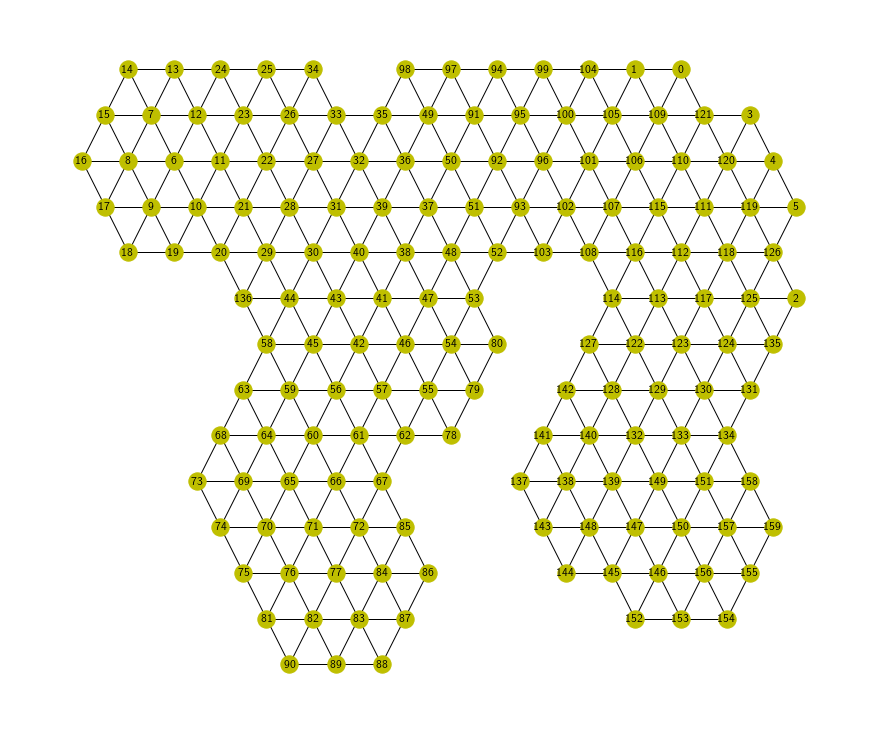

In [61]:
p = 2.01
R = 2*p-1
R=1.1
# R=2
# Adjacency matrix based on distance
A = np.array([[0<np.linalg.norm(X[i]-X[j])<R for j in range(n)] for i in range(n)])
# Communication radious

# A[A>r] = 0
# A



G = nx.from_numpy_matrix(A)
V = G.nodes()

labels = {i:i for i in V}
# nx.draw_networkx_nodes(G, pos=X, label=True,labels=labels)
# nx.draw_networkx_edges(G, pos=X, label=True,labels=labels)
nx.draw(G, pos=X, label=True,labels=labels, node_color='y')
plt.savefig("g.pdf")
pylab.rcParams['figure.figsize'] = (12.0, 10.0)

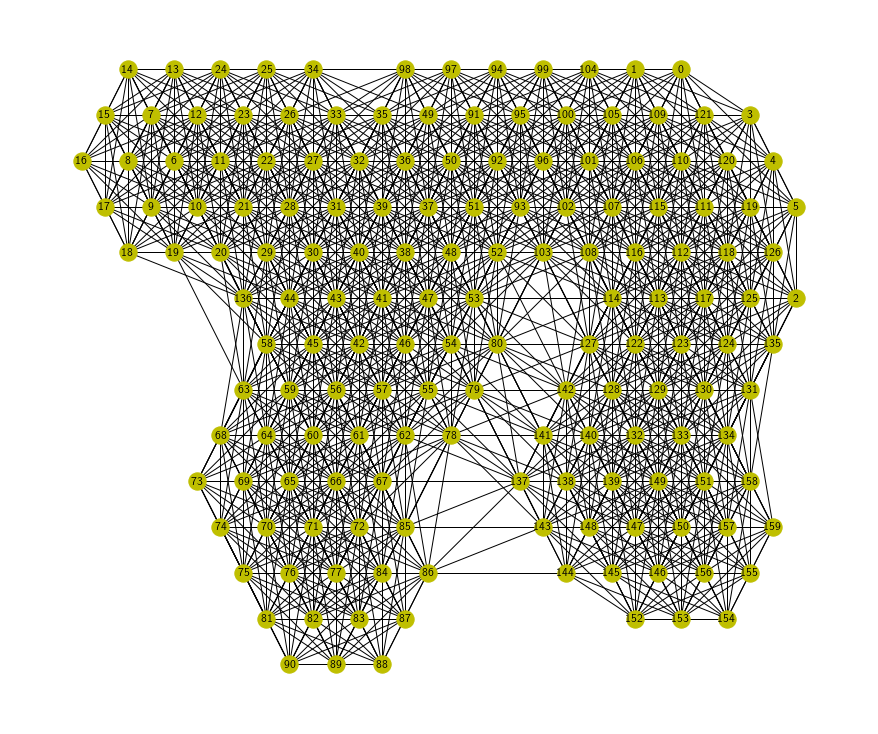

In [62]:
p = 2.01
R = 2*p-1
# R=1.1
# R=2
# Adjacency matrix based on distance
A = np.array([[0 < np.linalg.norm(X[i]-X[j]) < R for j in range(n)] for i in range(n)])
# Communication radious

# A[A>r] = 0
# A



G = nx.from_numpy_matrix(A)
V = G.nodes()

labels = {i:i for i in V}
# nx.draw_networkx_nodes(G, pos=X, label=True,labels=labels)
# nx.draw_networkx_edges(G, pos=X, label=True,labels=labels)
nx.draw(G, pos=X, label=True,labels=labels, node_color='y')
# plt.savefig("g.svg")


In [63]:
n

160

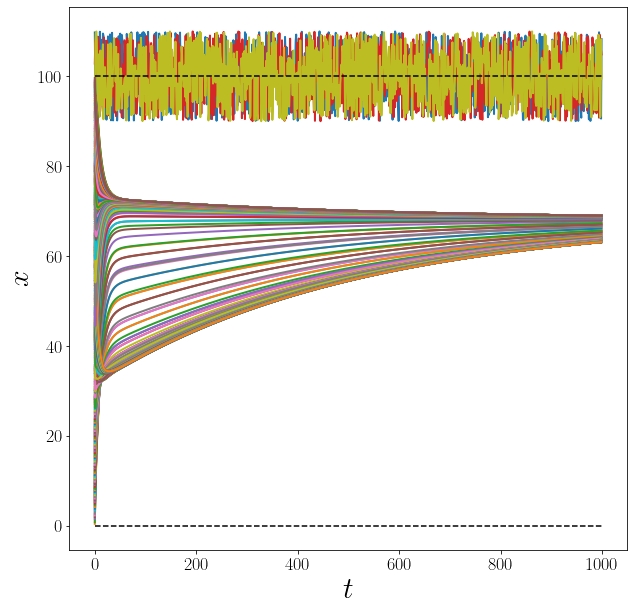

In [20]:
np.random.seed = 7
x0 = 100. * np.random.rand(n)
x0 = 100. * np.arange(n)/n

malicious_set = [0, 3, 8]
Xlog = WMSRv2(A, x0, id_malicious=malicious_set, tmax=1000)

plot_log_v2(Xlog,set_mal=malicious_set)

plt.xlabel('$t$',fontsize=30)
plt.ylabel('$x$',fontsize=30)

##convex hull
plt.plot([0,1000],[100,100],'k--')
plt.plot([0,1000],[0,0],'k--')

plt.savefig('simul1.pdf',bbox_inches='tight')


In [21]:
nx.algebraic_connectivity(G)

0.2547438942197895

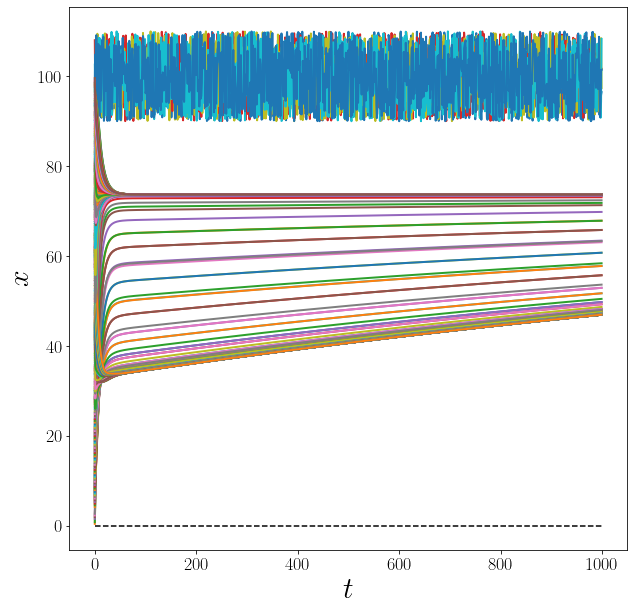

In [22]:
np.random.seed = 7
x0 = 100. * np.random.rand(n)
x0 = 100. * np.arange(n)/n

malicious_set = [0,3,8,9,10]
Xlog = WMSRv2(A, x0, id_malicious=malicious_set, tmax=1000)

plt.xlabel('$t$',fontsize=30)
plt.ylabel('$x$',fontsize=30)

##convex hull
plt.plot([0,1000],[100,100],'k--')
plt.plot([0,1000],[00,00],'k--')


plot_log_v2(Xlog, n-1)

plt.savefig('simul2.pdf',bbox_inches='tight')


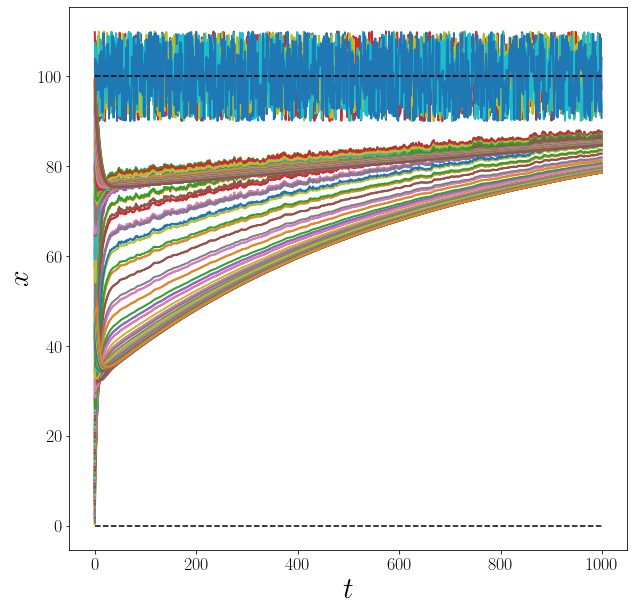

In [24]:
np.random.seed = 10
x0 = 100. * np.random.rand(n)
x0 = 100. * np.arange(n)/n

malicious_set = [0,3,8,9,10]
Xlog = WMSRv2(A, x0, f=3, id_malicious=malicious_set, tmax=1000)

plot_log_v2(Xlog, malicious_set)

plt.xlabel('$t$',fontsize=30)
plt.ylabel('$x$',fontsize=30)

##convex hull
plt.plot([0,1000],[100,100],'k--')
plt.plot([0,1000],[00,00],'k--')


plt.savefig('simul3.pdf',bbox_inches='tight')


# Checking backbone

In [38]:
xx,yy= [26.5, 25.5, 29.0, 28.0, 28.5, 29.0, 15.5, 15.0, 14.5, 15.0, 16.0, 16.5, 16.0, 15.5, 14.5, 14.0, 13.5, 14.0, 14.5, 15.5, 16.5, 17.0, 17.5, 17.0, 16.5, 17.5, 18.0, 18.5, 18.0, 17.5, 18.5, 19.0, 19.5, 19.0, 18.5, 20.0, 20.5, 21.0, 20.5, 20.0, 19.5, 20.0, 19.5, 19.0, 18.0, 18.5, 20.5, 21.0, 21.5, 21.0, 21.5, 22.0, 22.5, 22.0, 21.5, 21.0, 19.0, 20.0, 17.5, 18.0, 18.5, 19.5, 20.5, 17.0, 17.5, 18.0, 19.0, 20.0, 16.5, 17.0, 17.5, 18.5, 19.5, 16.0, 16.5, 17.0, 18.0, 19.0, 21.5, 22.0, 22.5, 17.5, 18.5, 19.5, 20.0, 20.5, 21.0, 20.5, 20.0, 19.0, 18.0, 22.0, 22.5, 23.0, 22.5, 23.0, 23.5, 21.5, 20.5, 23.5, 24.0, 24.5, 24.0, 23.5, 24.5, 25.0, 25.5, 25.0, 24.5, 26.0, 26.5, 27.0, 26.5, 26.0, 25.0, 26.0, 25.5, 27.0, 27.5, 28.0, 27.5, 27.0, 25.5, 26.5, 27.5, 28.0, 28.5, 24.5, 25.0, 26.0, 27.0, 28.0, 25.5, 26.5, 27.5, 28.5, 17.0, 23.0, 24.0, 25.0, 24.5, 23.5, 24.0, 23.5, 24.0, 25.0, 26.0, 25.5, 24.5, 26.0, 26.5, 27.0, 25.5, 26.5, 27.5, 28.0, 27.0, 27.5, 28.0, 28.5] , [21.650635094610966, 21.650635094610966, 17.32050807568877, 20.784609690826528, 19.918584287042087, 19.05255888325765,19.918584287042087, 20.784609690826528, 19.918584287042087, 19.05255888325765, 19.05255888325765, 19.918584287042087, 20.784609690826528, 21.650635094610966, 21.650635094610966, 20.784609690826528, 19.918584287042087, 19.05255888325765, 18.186533479473212, 18.186533479473212, 18.186533479473212, 19.05255888325765, 19.918584287042087, 20.784609690826528, 21.650635094610966, 21.650635094610966, 20.784609690826528, 19.918584287042087, 19.05255888325765, 18.186533479473212, 18.186533479473212, 19.05255888325765, 19.918584287042087, 20.784609690826528, 21.650635094610966, 20.784609690826528, 19.918584287042087, 19.05255888325765, 18.186533479473212, 19.05255888325765, 18.186533479473212, 17.32050807568877, 16.454482671904334, 17.32050807568877, 17.32050807568877, 16.454482671904334, 16.454482671904334, 17.32050807568877, 18.186533479473212, 20.784609690826528, 19.918584287042087, 19.05255888325765, 18.186533479473212, 17.32050807568877, 16.454482671904334, 15.588457268119894, 15.588457268119894, 15.588457268119894, 16.454482671904334, 15.588457268119894, 14.722431864335457, 14.722431864335457, 14.722431864335457, 15.588457268119894, 14.722431864335457, 13.856406460551018, 13.856406460551018, 13.856406460551018, 14.722431864335457, 13.856406460551018, 12.990381056766578, 12.990381056766578, 12.990381056766578, 13.856406460551018, 12.990381056766578, 12.12435565298214, 12.12435565298214, 12.12435565298214, 14.722431864335457, 15.588457268119894, 16.454482671904334, 11.258330249197702, 11.258330249197702, 11.258330249197702, 12.12435565298214, 12.990381056766578, 12.12435565298214, 11.258330249197702, 10.392304845413264, 10.392304845413264, 10.392304845413264, 20.784609690826528, 19.918584287042087, 19.05255888325765, 21.650635094610966, 20.784609690826528, 19.918584287042087, 21.650635094610966, 21.650635094610966, 21.650635094610966, 20.784609690826528, 19.918584287042087, 19.05255888325765, 18.186533479473212, 21.650635094610966, 20.784609690826528, 19.918584287042087, 19.05255888325765, 18.186533479473212, 20.784609690826528, 19.918584287042087, 19.05255888325765, 18.186533479473212, 17.32050807568877, 17.32050807568877, 19.05255888325765, 18.186533479473212, 17.32050807568877, 18.186533479473212, 19.05255888325765, 19.918584287042087, 20.784609690826528, 16.454482671904334, 16.454482671904334, 16.454482671904334, 17.32050807568877, 18.186533479473212, 16.454482671904334, 15.588457268119894, 15.588457268119894, 15.588457268119894, 15.588457268119894, 14.722431864335457, 14.722431864335457, 14.722431864335457, 16.454482671904334, 17.32050807568877, 13.856406460551018, 13.856406460551018, 13.856406460551018, 14.722431864335457, 14.722431864335457, 15.588457268119894, 12.990381056766578, 12.12435565298214, 12.12435565298214, 12.12435565298214, 12.990381056766578, 12.990381056766578, 13.856406460551018, 12.990381056766578, 13.856406460551018, 11.258330249197702, 11.258330249197702, 11.258330249197702, 12.12435565298214, 12.12435565298214, 12.990381056766578, 13.856406460551018, 12.990381056766578]

n = len(xx)
X = np.random.random((n, 2))*12
X[:,0], X[:,1] = xx,yy


p = 2.0
R = 2*p-1
R=2.1
# R=2
# Adjacency matrix based on distance
A = np.array([[np.linalg.norm(X[i]-X[j]) < R for j in range(n)] for i in range(n)])




G = nx.from_numpy_matrix(A)
V = G.nodes()
V

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159))

In [44]:
len(list(G.neighbors(159)))

9

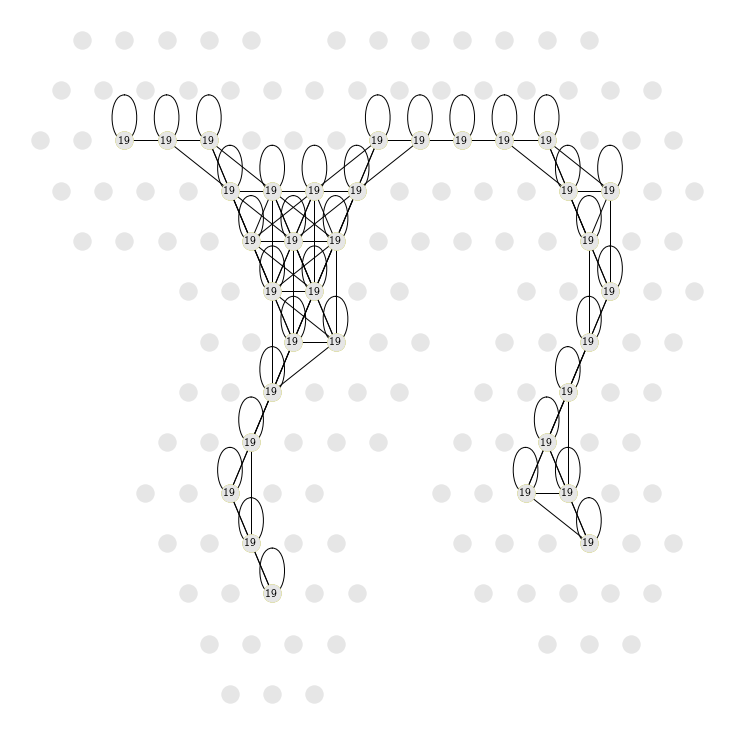

In [48]:
C = [i  for i in V if len(list(G.neighbors(i)))==19]


# for i in V:
#     surroundings = [j for j in V if np.linalg.norm(X[i]-X[j])<p]
    


labels = {i:len(list(G.neighbors(i)))  for i in C }
G_backbone = G.subgraph(C)

# nx.connected(G_backbone)
nx.draw(G_backbone, pos=X, label=True,labels=labels, node_color='y')

nx.draw_networkx_nodes(G, pos=X, label=True,node_color='0.9')
# nx.draw_networkx_labels(G_backbone, pos=X,labels=labels)
# print 'a'

TypeError: 'float' object cannot be interpreted as an integer

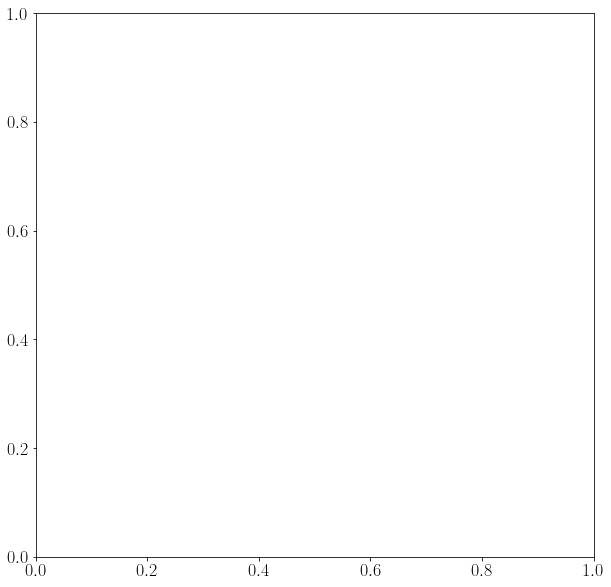

In [49]:
from JSAnimation import IPython_display
from matplotlib import animation

fig = plt.figure()
ax = plt.axes()

xsize, ysize = (0, 50),(0, 30)
xsize, ysize = (15),(15)
    
def circle(x, rad):
    theta = np.linspace(0,2*pi,100)
    xx = x[0] + rad * np.cos(theta)
    yy = x[1] + rad * np.sin(theta)
    return xx, yy

def animate(t):    
#     t=1000000
    ax.clear()
    pu = ax.plot(xsize, ysize, 'w.') 
    
    nx.draw_networkx_nodes(G, pos=X, label=True,labels=labels, node_color='1.0', ax=ax, linewidths=0.3)
    
    draw_V = V[:t]
    
    
    
    
    # gray
    not_backbone = [i for i in draw_V if i not in C]
    nx.draw_networkx_nodes(G, pos=X, label=True,labels=labels, node_color='0.7', nodelist=not_backbone, ax=ax)
    
    # red
    backbone = [i for i in draw_V if i in C]
    nx.draw_networkx_nodes(G, pos=X, label=True,labels=labels, node_color='r', nodelist=backbone, ax=ax)
    
    # Plot current
    # Current node
#     if t>len(V)+1:
#         ax.clear()
#         nx.draw_networkx_edges(G_backbone, pos=X, label=True,labels=labels, nodelist=backbone, node_color='b', ax=ax)        
        
#     el
    if t>0:
        ci = V[t-1]
        xx, yy = circle(X[ci], p)
        ax.plot(xx, yy, '--') 
        nx.draw_networkx_nodes(G, pos=X, label=True,labels=labels, node_color='b', nodelist=[ci], ax=ax)

        
    
        
    
    ax.set_xlim(5,40)
    ax.set_ylim(0,30)
#     ax.set_xlim(25,30)


    
    
#     ax.grid()
    return pu
    
anim = animation.FuncAnimation(fig, animate, frames=len(V)/1+1, interval=200, blit=True)

#anim.save('encirclement_novel.mp4', dpi=300)
anim

In [112]:
anim.save('checking.mp4', dpi=400)

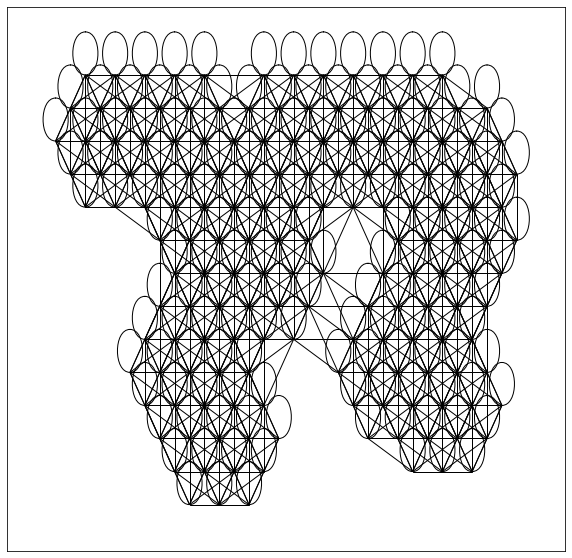

In [52]:
nx.draw_networkx_edges(G, pos=X, label=True)